<a href="https://colab.research.google.com/github/madonnaojorin/MAT343_Linear_Algebra/blob/main/Chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.1 Introduction to Systems of Linear Equations

##Definition of a Linear Equation in  Variables
A **linear equation in $n$ variable** has the form
$$a_1x_1+a_2x_2+a_3x_3+\cdots+a_nx_n=b.$$
The **coefficients** $a_1,a_2,\cdots,a_n$ are real numbers, and the **constant term** $b$ is a real number. The number $a_1$ is the **leading coefficient**, and $x_1$ is the **leading variable**.

####$\star$Example
Solve and graph each system of linear equations.



1.   \begin{align}
x+y&=3\\
x-y&=-1
\end{align}
2.    \begin{align}
x+y&=3\\
2x+2y&=6
\end{align}
3.    \begin{align}
x+y&=3\\
x+y&=1
\end{align}

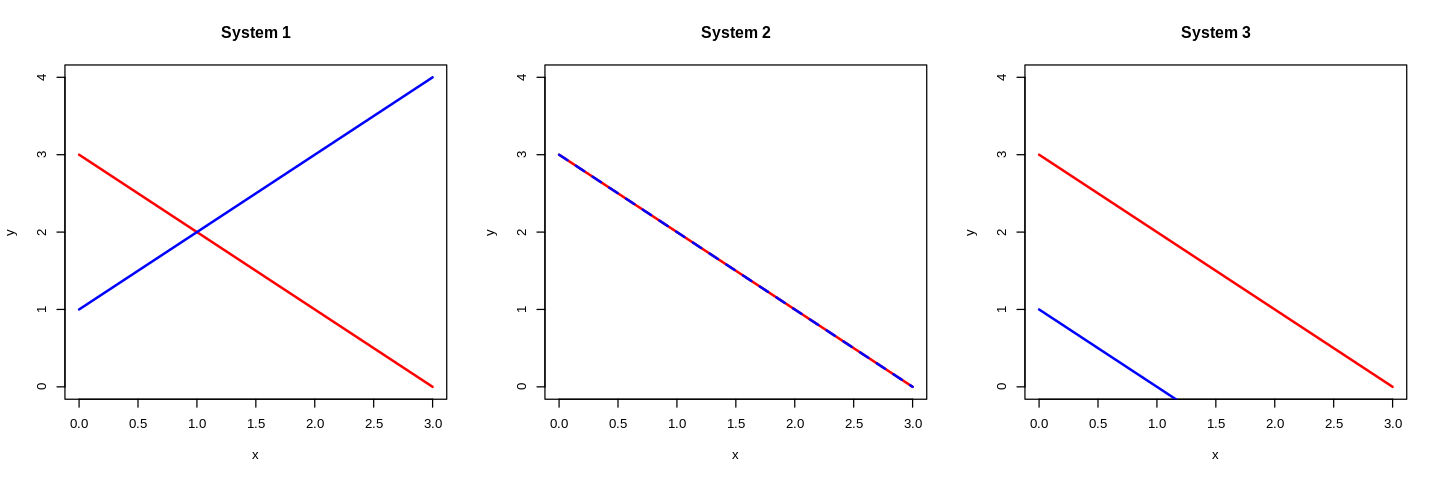

In [ ]:
options(repr.plot.width=12, repr.plot.height=4)
par(mfrow = c(1, 3))

x=seq(0,3,by=0.1)
a1=3-x
a2=1+x
plot(x, a1, xlim = c(0,3), ylim = c(0,4), type = "l", col = "red", lwd =2, ylab = "y", main = "System 1")
lines(x, a2, type = "l", col = "blue", lwd =2)
b1=3-x
b2=3-x
plot(x, b1, xlim = c(0,3), ylim = c(0,4), type = "l", col = "red", lwd =2, ylab = "y", main = "System 2")
lines(x, b2, type = "l", col = "blue", lwd =2, lty = 2)
c1=3-x
c2=1-x
plot(x, c1, xlim = c(0,3), ylim = c(0,4), type = "l", col = "red", lwd =2, ylab = "y", main = "System 3")
lines(x, c2, type = "l", col = "blue", lwd =2)

This example illustrates the three basic types of solution sets that are possible for a system of linear equations. 

*   System 1: Two intersecting lines
*   System 2: Two coincident lines
*   System 3: Two parallel lines




###Number of Solutions of a System of Linear Equations
For a system of linear equations, precisely one of the statements below is true.
* The system has exactly one solution (consistent system).
* The system has infinitely many solutions (consistent system).
* The system has no solution (inconsistent system).

#1.2. Gaussian and Gauss-Jordan Elimination

##Definition of a Matrix
If $m$ and $n$ are positive integers, then an $m\times n$ (read “$m$ by $n$”) matrix is a rectangular array
in which each **entry**, $a_{ij}$, of the matrix is a number. An $m\times n$ matrix has $m$ rows and $n$ columns. Matrices are usually denoted by capital letters.

###Elementary Row Operations
* Interchange two rows.
* Multiply a row by a nonzero constant.
* Add a multiple of a row to another row.

###Row-Echelon Form and Reduced Row-Echelon Form
A matrix in **row-echelon form** has the properties below.
* Any rows consisting entirely of zeros occur at the bottom of the matrix.
* For each row that does not consist entirely of zeros, the first nonzero entry is  (called a leading 1). 
* For two successive (nonzero) rows, the leading 1 in the higher row is farther to the left than the leading 1 in the lower row.
A matrix in row-echelon form is in **reduced row-echelon form** when every column that has a leading 1 has zeros in every position above and below its leading 1.

#Gaussian Elimination 
Gaussian elimination is a method for solving systems of equations in matrix form.<br>
**Goal**: turn matrix into row-echelon form 
  $$\begin{bmatrix}
   1 & a & b & d \\
   0 & 1 & c & e \\
   0 & 0 & 1 & f \\
\end{bmatrix}$$
Once in this form, we can say that $z=f$ and use back substitution to solve for $y$ and $x$.<br>
Use the elementary row operations and follow these steps:
 

1.   Get a 1 in the i-th column, i-th row
2.   Use the 1 to get 0’s in the remainder of the i-th column
3.   Repest the same steps for i+1-th


#Gauss-Jordan Elimination 
Gauss-Jordan elimination is another method for solving systems of equations in matrix form. It is really a continuation of Gaussian elimination.<br>
**Goal**: turn matrix into reduced row-echelon form 
  $$\begin{bmatrix}
   1 & 0 & 0 & a \\
   0 & 1 & 0 & b \\
   0 & 0 & 1 & c \\
\end{bmatrix}$$
Once in this form, we can say that $x=a, y=b, z=c$ (no need to do back-substitution).<br>
Use the elementary row operations as before.

####$\star$Example: Implementing in R
Let's sole the following system using Gauss-Jordan elimination.
\begin{eqnarray}
2x-5y+5z&=&17\\
x-2y+3z&=&9\\
-x+3y\hspace{11mm}&=&-4
\end{eqnarray}

In [ ]:
# Set a matrix that you want to solve
M = 3 # number of rows
N = 4 # number of columns
A <- matrix (c(2,-5,5,17,1,-2,3,9,-1,3,0,-4), M, N, byrow = T)

####Implementing Elementary Operations

1.   Op_multiply <br>
Multiply a row by a nonzero constant.
2.   Op_add <br>
Add a multiple of a row to another row.<br>

Applying an elementary row operation to a matrix is equivalent to premultiplying the matrix by an elementary matrix, which are computed in R by

In [ ]:
Op_multiply <- function (n, i, x) {
  s <- diag (n)
  s [i, i] <- x
  return (s)
}

Op_add <- function (n, i, j, x) {
  t <- diag (n)
  t [i, j] <- x
  return (t)    
}

In [ ]:
gaussMatrixForward <- function (a) {
  n <- nrow (a)
    for (i in 1 : n) {
        a <- Op_multiply (n, i, 1 / a[i, i]) %*% a
       if (i == n) {
            break ()
        }
        for (j in (i + 1) : n) {
            a <- Op_add (n, j, i, - a[j, i]) %*% a
            print(a)
        }
    }
    print(a)
    return (a)
}

In [ ]:
row_echelon <- gaussMatrixForward (cbind(A,diag(3)))

In [ ]:
gaussMatrixBackward <- function (a) {
  n <- nrow (a)
    for (i in n : 2) {
        for (j in (i - 1) : 1) {
            a <- Op_add (n, j, i, - a[j, i]) %*% a
            print(a)
        }
    }
    return (a)
}

In [ ]:
reduced_row_echelon <- gaussMatrixBackward (row_echelon)

**We can also use the package to perform Gauss-Jordan Elimination.**

In [ ]:
install.packages("pracma")
library(pracma)

(A <- matrix (c(2,-5,5,17,1,-2,3,9,-1,3,0,-4), 3, 4, byrow = T))
(B <- rref(A))

###Homogeneous Systems of Linear Equations
Systems of linear equations in which each of the constant terms is zero are called **homogeneous**.\\
A homogeneous system must have at least one solution. Specifically, if all variables in a homogeneous system have the value zero, then each of the equations is satisfied. Such a solution is **trivial**.


###Theorem 1.1: The Number of Solutions of a Homogeneous System
Every homogeneous system of linear equations is consistent. Moreover, if the system has fewer equations than variables, then it must have infinitely many solutions.

A homogeneous system of equations always either has 
* a unique solution or
* an infinite number of solutions.